<a href="https://colab.research.google.com/github/shashank297/Global-Emissions-Data-Analysis/blob/main/Global_Emissions_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Download the dataset from this [link](https://www.kaggle.com/datasets/ashishraut64/global-methane-emissions). You can find the dataset description there itself. Read it carefully and answer the questions below

**Make sure you write necessary Python code and use necessary visuals to support your answer**


In [69]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from google.colab import drive

In [70]:
drive.mount('/drive')

Drive already mounted at /drive; to attempt to forcibly remount, call drive.mount("/drive", force_remount=True).


### Columns category types
- **region**:- `categorical`
- **country**:- `categorical`
- **emissions**:- `Numarical`
- **type**:- `categorical`
- **segment**:- `categorical`
- **reason**:- `categorical`
- **baseyear**:- `time_categorical`
- **notes**:- `categorical`

In [71]:
df=pd.read_csv('/drive/My Drive/Data set masai/Methane_final.csv')
df.drop('Unnamed: 0',axis=1,inplace=True)
df.head()

,region,country,emissions,type,segment,reason,baseYear,notes
0,Africa,Algeria,257.611206,Agriculture,Total,All,2019-2021,Average based on United Nations Framework Conv...
1,Africa,Algeria,0.052000,Energy,Bioenergy,All,2022,Estimates from end-uses are for 2020 or 2021 (...
2,Africa,Algeria,130.798996,Energy,Gas pipelines and LNG facilities,Fugitive,2022,Not available
3,Africa,Algeria,69.741898,Energy,Gas pipelines and LNG facilities,Vented,2022,Not available
4,Africa,Algeria,213.987000,Energy,Onshore gas,Fugitive,2022,Not available


#### Find out the dataset dimensions

In [72]:
df.shape

(1548, 8)

#### Find out statistical summary of the Dataset

**Assumption based on below cell**
- because of outliers and diffrence between Min and max values the mean is not the best representation

In [73]:
df.describe()

,emissions
count,1548.000000
mean,643.255972
std,5566.238201
min,0.000459
25%,2.659361
50%,24.064669
75%,128.419594
max,141953.765625


In [74]:
df[['emissions']].median()

emissions    24.064669
dtype: float64

#### Check for the null values in Dataset

In [75]:
df.isnull().sum()

region       0
country      0
emissions    0
type         0
segment      0
reason       0
baseYear     0
notes        0
dtype: int64

#### Check for the noise value of the dataset

In [76]:
for i in df.columns:
  print(i,df[i].unique())

region ['Africa' 'Asia Pacific' 'Central and South America' 'Europe'
 'Middle East' 'North America' 'Other' 'Russia & Caspian' 'World']
country ['Algeria' 'Angola' 'Benin' 'Botswana' 'Cameroon'
 'Central African Republic' 'Chad' 'Congo' "Cote d'Ivoire"
 'Democratic Republic of Congo' 'Egypt' 'Equatorial Guinea' 'Eritrea'
 'Ethiopia' 'Gabon' 'Gambia' 'Ghana' 'Guinea' 'Guinea-Bissau' 'Kenya'
 'Liberia' 'Libya' 'Morocco' 'Mozambique' 'Namibia' 'Niger' 'Nigeria'
 'Senegal' 'Seychelles' 'Sierra Leone' 'Somalia' 'South Africa'
 'South Sudan' 'Sudan' 'Tanzania' 'Togo' 'Tunisia' 'Australia'
 'Bangladesh' 'Brunei' 'China' 'India' 'Indonesia' 'Japan' 'Korea'
 'Malaysia' 'Mongolia' 'New Zealand' 'Other countries in Southeast Asia'
 'Pakistan' 'Philippines' 'Thailand' 'Vietnam' 'Argentina' 'Bolivia'
 'Brazil' 'Colombia' 'Cuba' 'Ecuador' 'Guyana' 'Paraguay' 'Peru'
 'Trinidad and Tobago' 'Uruguay' 'Venezuela' 'Denmark' 'Estonia'
 'European Union' 'France' 'Germany' 'Israel' 'Italy' 'Netherlands'
 'N

In [77]:
df[df.region=='World'].count()

region       22
country      22
emissions    22
type         22
segment      22
reason       22
baseYear     22
notes        22
dtype: int64

In [78]:
df[df.region=='Other'].count()

region       21
country      21
emissions    21
type         21
segment      21
reason       21
baseYear     21
notes        21
dtype: int64

#### Handle the null values in the Dataset

### As checked there is no Null values

#### Handle the Noise Values in Dataset

- In the `region` column there is a catagory `World` and `Other` which is refering to the same info. So, replacing `World` with `Other`.
- In the `baseyear` column `2019-2021` replacing with `2021`

In [79]:
df.region=df.region.str.replace('World','Other')
df.baseYear=df.baseYear.str.replace('2019-2021','2021')

In [80]:
df.head()

,region,country,emissions,type,segment,reason,baseYear,notes
0,Africa,Algeria,257.611206,Agriculture,Total,All,2021,Average based on United Nations Framework Conv...
1,Africa,Algeria,0.052000,Energy,Bioenergy,All,2022,Estimates from end-uses are for 2020 or 2021 (...
2,Africa,Algeria,130.798996,Energy,Gas pipelines and LNG facilities,Fugitive,2022,Not available
3,Africa,Algeria,69.741898,Energy,Gas pipelines and LNG facilities,Vented,2022,Not available
4,Africa,Algeria,213.987000,Energy,Onshore gas,Fugitive,2022,Not available


#### Check the outliers for various Thresholds (1.5 x IQR , 2 X IQR and so on) for Numeric Columns

**As check there is outliares but after ckecking the values are correct**
- because of each country and region as a diffirant productions and and manufacuring capabilities which is directly related to emissions.
- So, dicided not to remove outliare.

In [81]:
df[df['emissions']>10000].sort_values(by='emissions',ascending=False)

,region,country,emissions,type,segment,reason,baseYear,notes
1526,Other,World,141953.765625,Agriculture,Total,All,2021,Average based on United Nations Framework Conv...
1545,Other,World,133350.984375,Energy,Total,All,2022,Estimates from end-uses are for 2020 or 2021 (...
1547,Other,World,70758.710938,Waste,Total,All,2021,Average based on United Nations Framework Conv...
1544,Other,World,30296.500000,Energy,Steam coal,All,2022,Not available
1540,Other,World,25941.500000,Energy,Onshore oil,Vented,2022,Not available
478,Asia Pacific,China,25372.222656,Energy,Total,All,2022,Estimates from end-uses are for 2020 or 2021 (...
460,Asia Pacific,China,18501.914062,Agriculture,Total,All,2021,Average based on United Nations Framework Conv...
481,Asia Pacific,India,18358.517578,Agriculture,Total,All,2021,Average based on United Nations Framework Conv...
1489,Russia & Caspian,Russia,18078.083984,Energy,Total,All,2022,Estimates from end-uses are for 2020 or 2021 (...
1406,North America,United States,16769.630859,Energy,Total,All,2022,Estimates from end-uses are for 2020 or 2021 (...


In [82]:
Q1 = df['emissions'].quantile(0.25)
Q3 = df['emissions'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR
df=df[(df['emissions'] >= lower_bound) & (df['emissions'] <= upper_bound)]

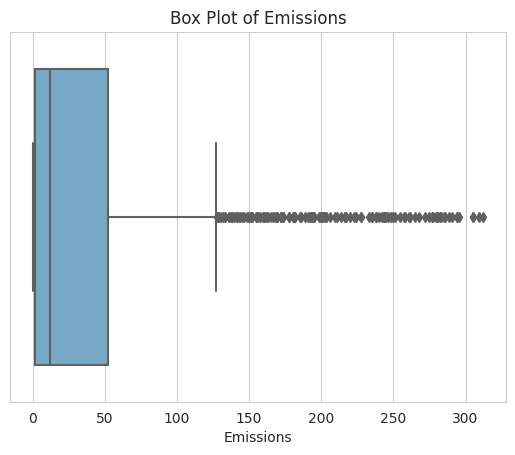

In [83]:
sns.set_style('whitegrid')
sns.boxplot(data=df, x='emissions', palette='Blues')

# Set the x-axis label
plt.xlabel('Emissions')

# Set the title
plt.title('Box Plot of Emissions')

# Show the chart
plt.show()

In [121]:
df.shape

(1295, 8)

In [122]:
df.describe()

,emissions
count,1295.000000
mean,42.073752
std,64.535798
min,0.000459
25%,1.711515
50%,12.067670
75%,51.989401
max,312.399994


In [125]:
df[['emissions']].sort_values(by='emissions').median()

emissions    12.06767
dtype: float64

**Univariate Analysis**
- `region`:-Africa has the higher count `364` with the with a `28.1` Percentage.

- `country`:-New Zealand has the highest count in the country column is `20` and the mean of the Value _count is `12.45`

- `type`:- In the this column `energy` has the highest count with `84.2%` percente and all the others are with `6.8%`. 
- `segment`:- In the this column `total` has the highest count `414` with the `26.7%` then `Onshore oil` with `217` with `14.0%` percentage

- `reason`:- In this column `ALL` has the hightest count with `48.2%` then `22.1%` with fugitive

- `baseyear`:- In this column the `2022` has the highest count with `79.7%` and `2021` has 20.3%.


In [84]:
df.region.value_counts()

Africa                       364
Europe                       271
Asia Pacific                 218
Middle East                  161
Central and South America    159
Russia & Caspian              70
North America                 37
Other                         15
Name: region, dtype: int64

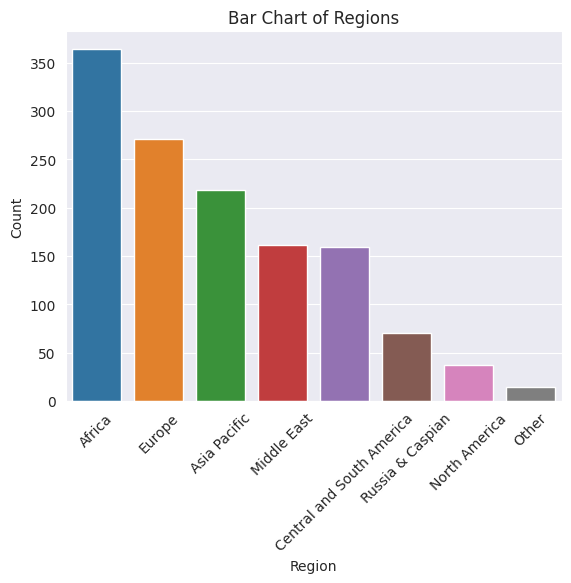

In [85]:

# Use Pandas to count the number of occurrences of each region
region_counts = df.region.value_counts()
sns.set_style('darkgrid')
# Use Seaborn to create a bar chart
sns.barplot(x=region_counts.index, y=region_counts.values)
# Set the x-axis label
plt.xlabel('Region')

# Set the y-axis label
plt.ylabel('Count')

# Set the title
plt.title('Bar Chart of Regions')

# Rotate the x-axis labels
plt.xticks(rotation=45)

# Show the chart
plt.show()

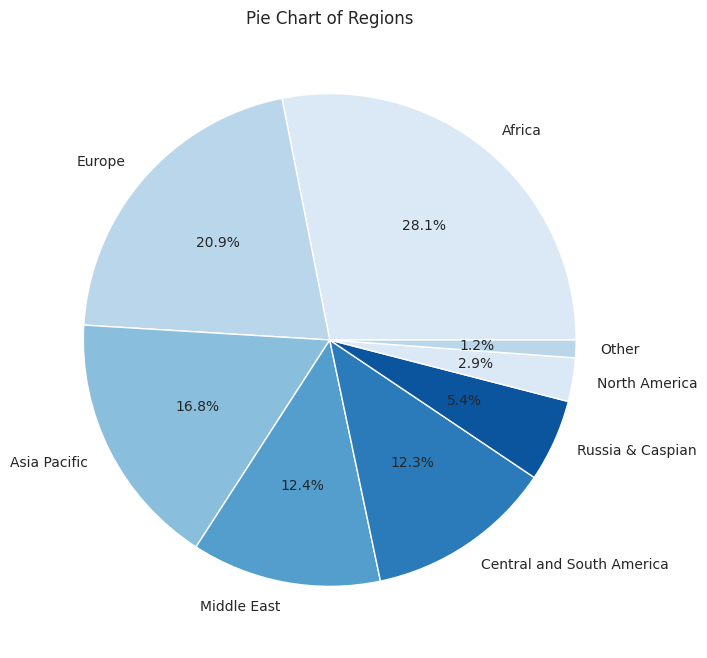

In [86]:
# Use Pandas to count the number of occurrences of each region
region_counts = df.region.value_counts()

# Use Seaborn to create a pie chart
sns.set_style('whitegrid')
plt.figure(figsize=(12,8))
plt.pie(x=region_counts.values, labels=region_counts.index, autopct='%0.1f%%', colors=sns.color_palette('Blues'))

# Set the title
plt.title('Pie Chart of Regions')

# Show the chart
plt.show()

In [87]:
df.country.value_counts()

New Zealand                 20
Other EU17 countries        19
Romania                     19
Norway                      19
United Kingdom              19
                            ..
Guinea-Bissau                3
Central African Republic     3
Seychelles                   3
Sierra Leone                 3
Liberia                      3
Name: country, Length: 104, dtype: int64

In [88]:
df.country.value_counts().mean()

12.451923076923077

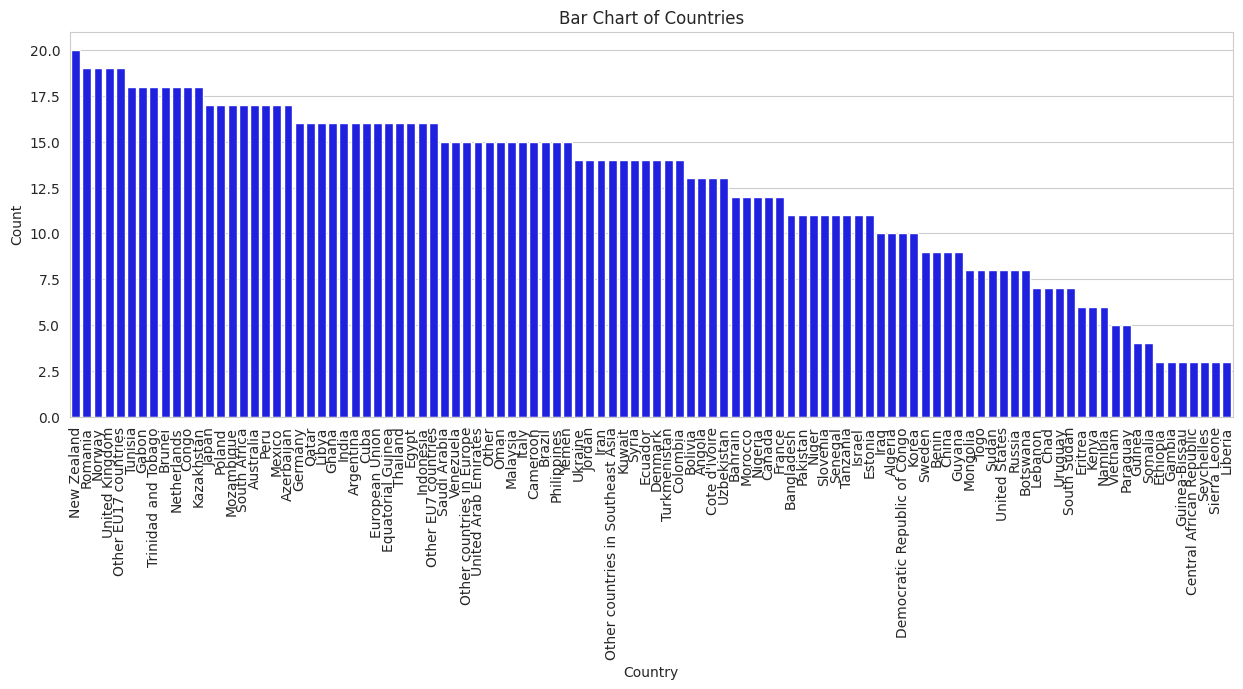

In [89]:
# Set plot size
plt.figure(figsize=(15, 5))

country_counts = df.country.value_counts().sort_values(ascending=False)

# Use Seaborn to create a bar chart
sns.set_style('whitegrid')
sns.barplot(x=country_counts.index, y=country_counts.values, color='blue')

# Set the x-axis label
plt.xlabel('Country')

# Set the y-axis label
plt.ylabel('Count')

# Set the title
plt.title('Bar Chart of Countries')

# Rotate the x-axis labels to avoid overlapping
plt.xticks(rotation=90)

# Show the chart
plt.show()

In [90]:
df.type.value_counts()

Energy         1091
Other            95
Waste            61
Agriculture      48
Name: type, dtype: int64

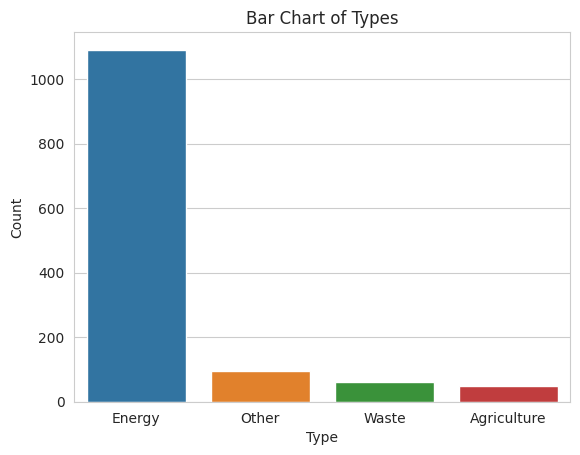

In [91]:
# Use Pandas to count the number of occurrences of each type
type_counts = df.type.value_counts()

# Use Seaborn to create a bar chart
sns.set_style('whitegrid')
sns.barplot(x=type_counts.index, y=type_counts.values)

# Set the x-axis label
plt.xlabel('Type')

# Set the y-axis label
plt.ylabel('Count')

# Set the title
plt.title('Bar Chart of Types')

# Show the chart
plt.show()

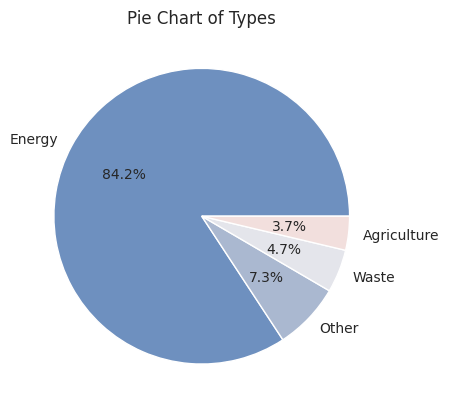

In [92]:
# Use Pandas to count the number of occurrences of each type
type_counts = df.type.value_counts()

# Use Seaborn to create a pie chart
sns.set_style('whitegrid')
plt.pie(type_counts.values, labels=type_counts.index, autopct='%0.1f%%',colors=sns.color_palette('vlag'))

# Set the title
plt.title('Pie Chart of Types')

# Show the chart
plt.show()

Text(0.5, 0, 'Type')

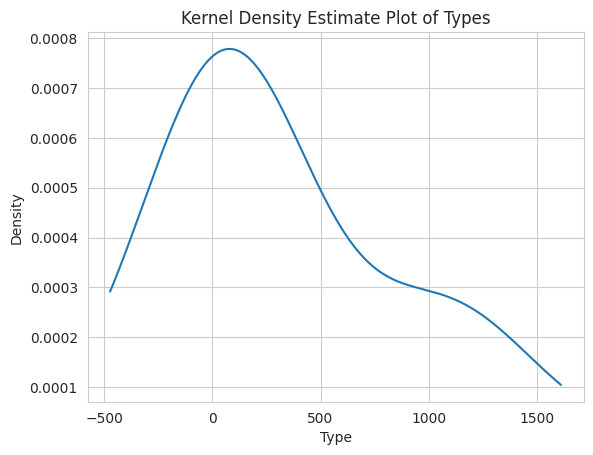

In [93]:
sns.set_style('whitegrid')
df.type.value_counts().plot(kind='kde')
plt.title('Kernel Density Estimate Plot of Types')
plt.xlabel('Type')

In [94]:
df.segment.value_counts()

Total                                             260
Onshore oil                                       189
Gas pipelines and LNG facilities                  155
Offshore oil                                      150
Onshore gas                                       132
Offshore gas                                      113
Other from oil and gas                             95
Bioenergy                                          85
Other from coal                                    64
Coking coal                                        19
Satellite-detected large oil and gas emissions     17
Steam coal                                         16
Name: segment, dtype: int64

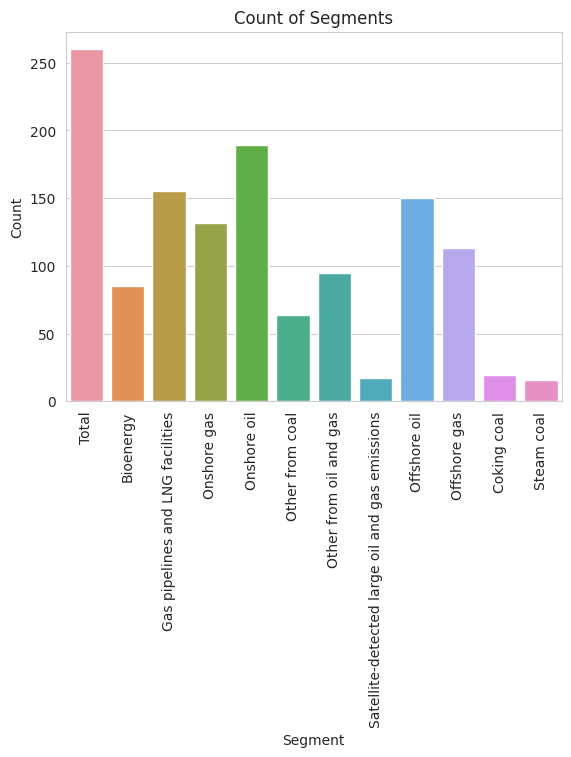

In [95]:

# Use Seaborn to create a count plot
sns.set_style('whitegrid')
sns.countplot(data=df, x='segment')

# Set the title and labels
plt.title('Count of Segments')
plt.xlabel('Segment')
plt.ylabel('Count')
plt.xticks(rotation=90)
# Show the plot
plt.show()

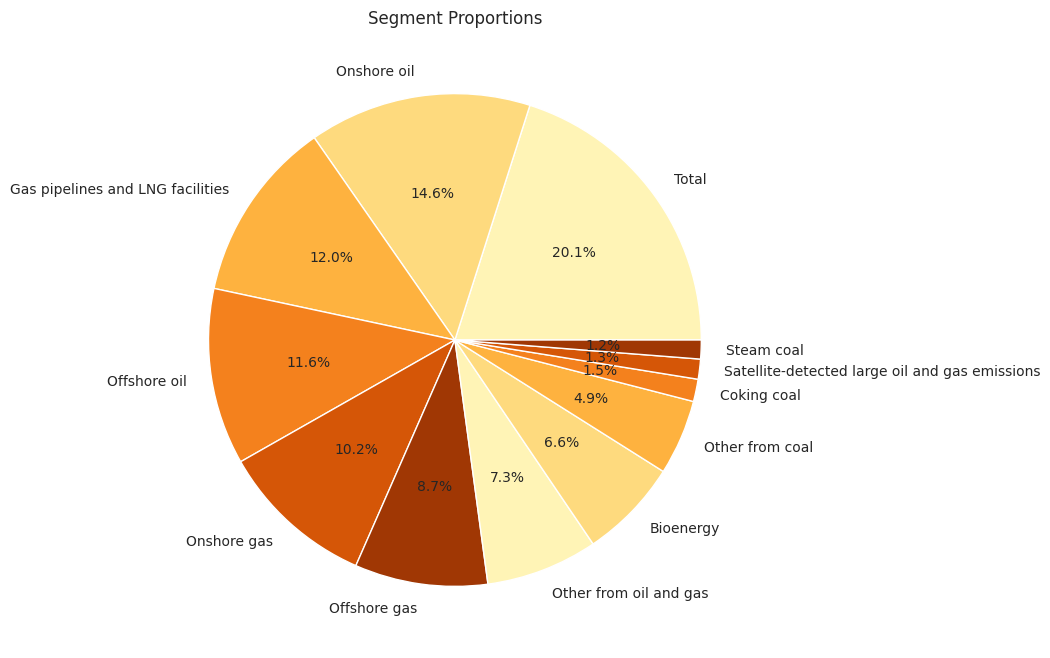

In [96]:
# Set the figure size
plt.figure(figsize=(10, 8))

# Use Seaborn to create a pie chart
sns.set_style('whitegrid')
df['segment'].value_counts().plot(kind='pie', autopct='%0.1f%%',colors=sns.color_palette('YlOrBr'))

# Set the title and labels
plt.title('Segment Proportions')
plt.ylabel('')

# Show the plot
plt.show()

In [97]:
df.reason.value_counts()

All         556
Fugitive    326
Vented      304
Flared      109
Name: reason, dtype: int64

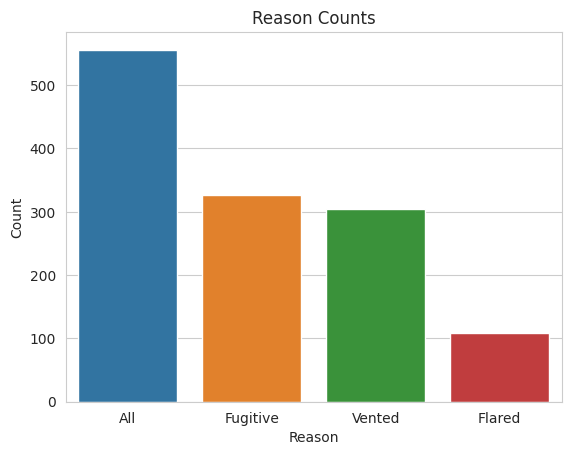

In [98]:
sns.set_style('whitegrid')
sns.countplot(x='reason', data=df)

# Set the title and labels
plt.title('Reason Counts')
plt.xlabel('Reason')
plt.ylabel('Count')

# Show the plot
plt.show()

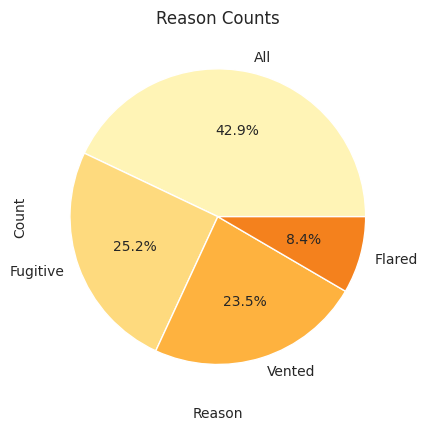

In [99]:
df.reason.value_counts().plot(kind='pie',autopct='%0.1f%%',colors=sns.color_palette('YlOrBr'))

# Set the title and labels
plt.title('Reason Counts')
plt.xlabel('Reason')
plt.ylabel('Count')

# Show the plot
plt.show()

In [100]:
df.baseYear.value_counts()

2022    1091
2021     204
Name: baseYear, dtype: int64

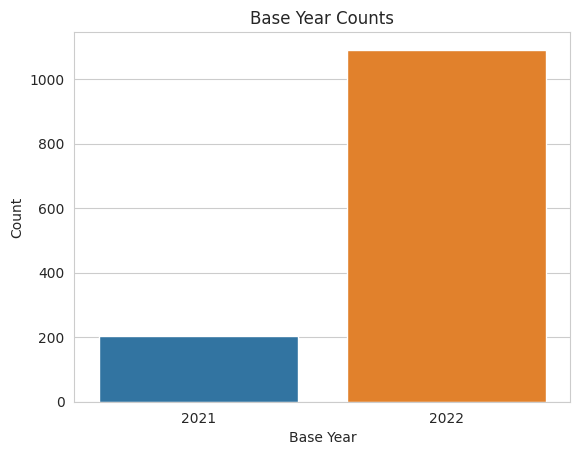

In [101]:
# Use Seaborn to create a bar chart
sns.set_style('whitegrid')
sns.countplot(x='baseYear', data=df)

# Set the title and labels
plt.title('Base Year Counts')
plt.xlabel('Base Year')
plt.ylabel('Count')

# Show the plot
plt.show()

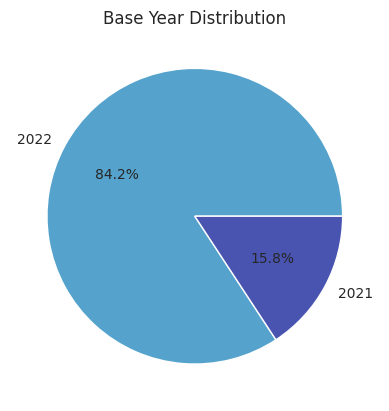

In [102]:
# Calculate the counts of each base year
counts = df.baseYear.value_counts()

# Create a pie chart using Matplotlib
plt.pie(counts, labels=counts.index, autopct='%0.1f%%',colors=sns.color_palette('icefire'))

# Set the title
plt.title('Base Year Distribution')

# Show the plot
plt.show()

**Numrical column Univariant analysis**


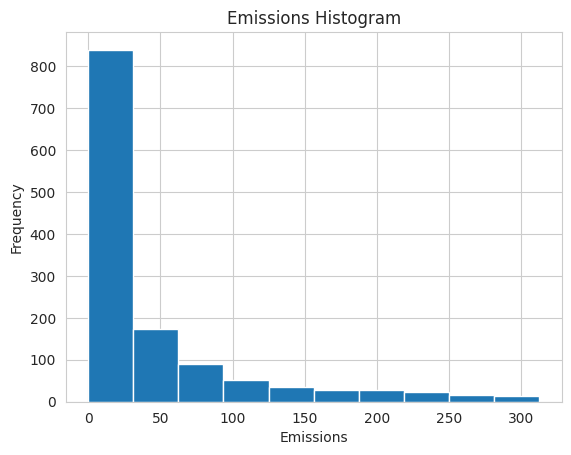

In [103]:
# Create a histogram using Matplotlib
plt.hist(df.emissions)

# Set the x-axis label
plt.xlabel('Emissions')

# Set the y-axis label
plt.ylabel('Frequency')

# Set the title
plt.title('Emissions Histogram')

# Show the plot
plt.show()

##**Bivariate Analysis**


In [104]:
df.head()

,region,country,emissions,type,segment,reason,baseYear,notes
0,Africa,Algeria,257.611206,Agriculture,Total,All,2021,Average based on United Nations Framework Conv...
1,Africa,Algeria,0.052000,Energy,Bioenergy,All,2022,Estimates from end-uses are for 2020 or 2021 (...
2,Africa,Algeria,130.798996,Energy,Gas pipelines and LNG facilities,Fugitive,2022,Not available
3,Africa,Algeria,69.741898,Energy,Gas pipelines and LNG facilities,Vented,2022,Not available
4,Africa,Algeria,213.987000,Energy,Onshore gas,Fugitive,2022,Not available


### **Region**
- `North America`:- has the highest mean in the column `70.84`, min:-`0.000459`, max:- `309.15`,count:- `37`
- `Africa`:- has the highest count `364`, mean:-`40.10`, min:- `0.00264`,max:-`295`
- `Russia & Caspian`:- has the hightest max value in the column `312.39` ,mean:- `69.92`, count:- `70`, min:- `0.012`

In [105]:
df.groupby('region')['emissions'].agg(['mean', 'min', 'max','count'])

,mean,min,max,count
region,,,,
Africa,40.107377,0.001264,295.379517,364
Asia Pacific,45.101377,0.010167,294.390991,218
Central and South America,36.836025,0.004000,281.032013,159
Europe,32.441628,0.001081,304.996002,271
Middle East,46.550486,0.020000,257.994934,161
North America,70.848709,0.113724,309.158997,37
Other,26.352075,0.000459,82.033897,15
Russia & Caspian,69.920047,0.012000,312.399994,70


<Figure size 1200x500 with 0 Axes>

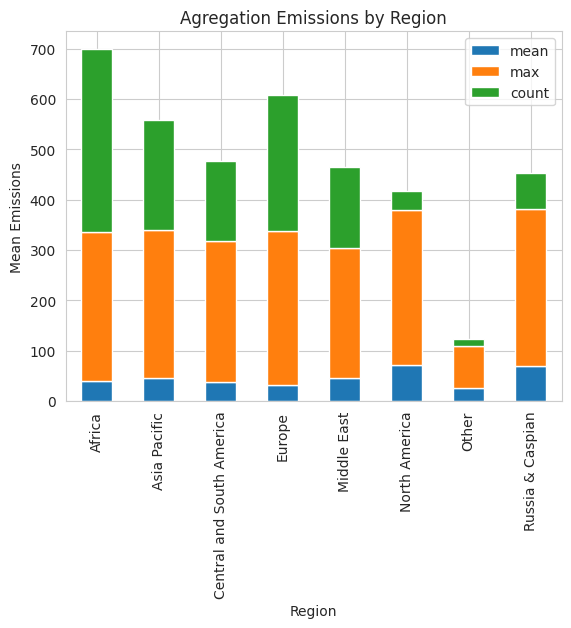

In [106]:
plt.figure(figsize=(12,5))
df.groupby('region')['emissions'].agg(['mean', 'max','count']).plot(kind='bar',stacked=True)
plt.title('Agregation Emissions by Region')
plt.xlabel('Region')
plt.ylabel('Mean Emissions')
plt.xticks(rotation=90)
plt.show()

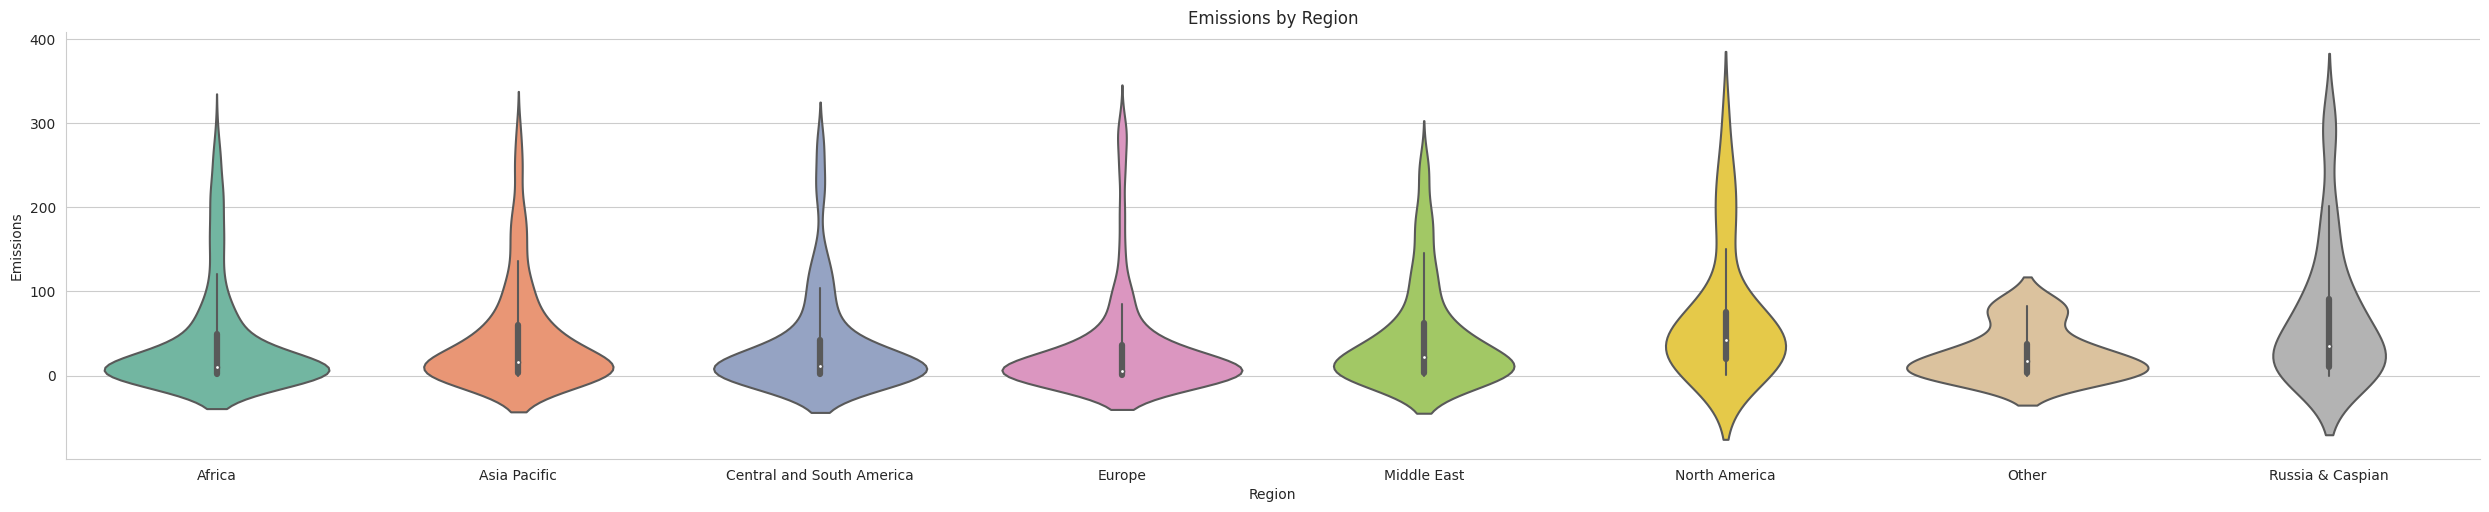

In [107]:
sns.set_style('whitegrid')
sns.catplot(x='region', y='emissions', data=df, kind='violin', aspect=5, palette='Set2')
plt.title('Emissions by Region')
plt.xlabel('Region')
plt.ylabel('Emissions')
plt.show()


### **Country**
- `Central African Republic`:- Has the highest emissions mean `149.047` in the column but has only `3` count.
- `New Zealand`:- Has the highest count in the column but has the emissions mean `12.39`
- `Turkmenistan`:- Has the max `312.39`kt. emissions and `104.78`kt mean.


In [108]:
df.groupby('country')['emissions'].agg(['mean', 'min', 'max','count']).sort_values(by='mean',ascending=False).head(10)

,mean,min,max,count
country,,,,
Central African Republic,149.047429,22.856339,250.816803,3
United States,114.905427,18.310400,309.158997,8
China,111.138421,15.842800,294.390991,9
Turkmenistan,104.784516,0.088000,312.399994,14
European Union,95.624971,1.691410,304.996002,16
Iran,90.703651,0.256080,243.432007,14
Algeria,84.506657,0.004000,257.611206,10
Kenya,83.783592,0.216000,180.646713,6
Uzbekistan,81.936923,0.012000,280.418243,13


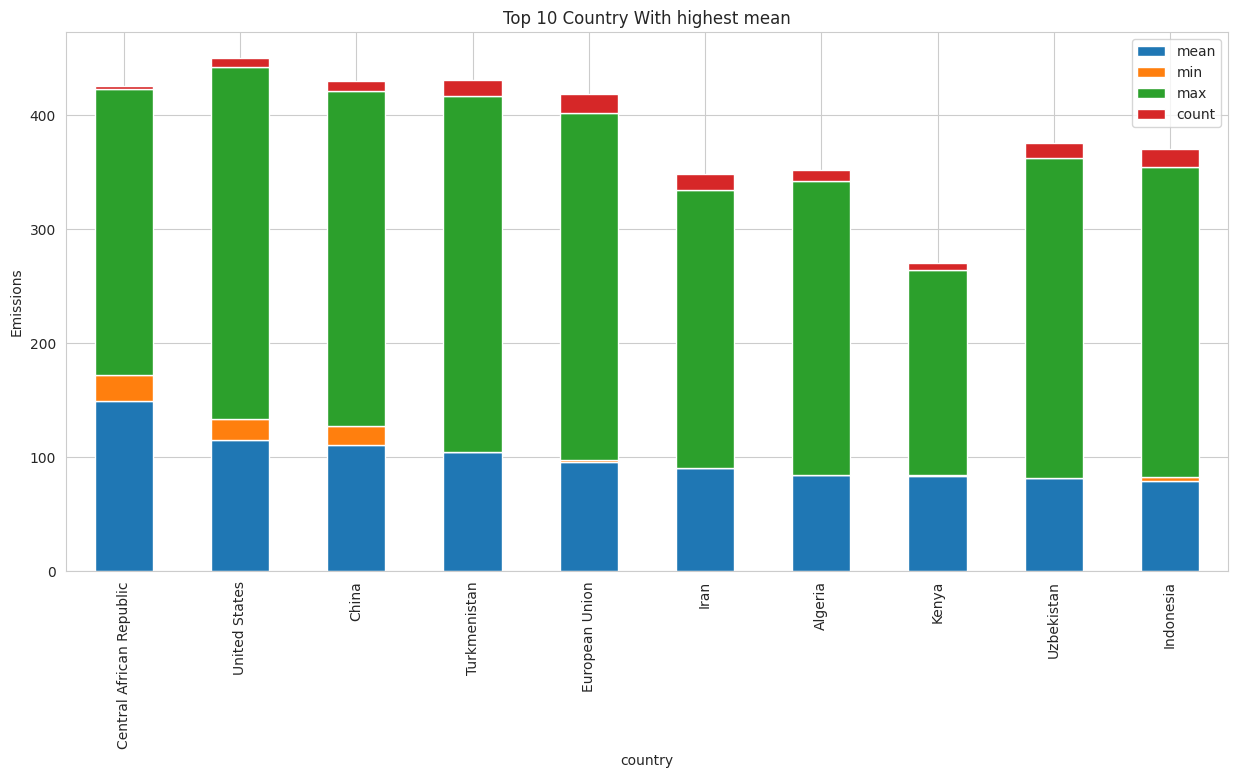

In [109]:
df.groupby('country')['emissions'].agg(['mean', 'min', 'max','count']).sort_values(by='mean',ascending=False).head(10).plot(kind='bar', stacked=True,figsize=(15, 7))
plt.title('Top 10 Country With highest mean')
plt.xlabel('country')
plt.ylabel('Emissions')
plt.xticks(rotation=90)
plt.show()

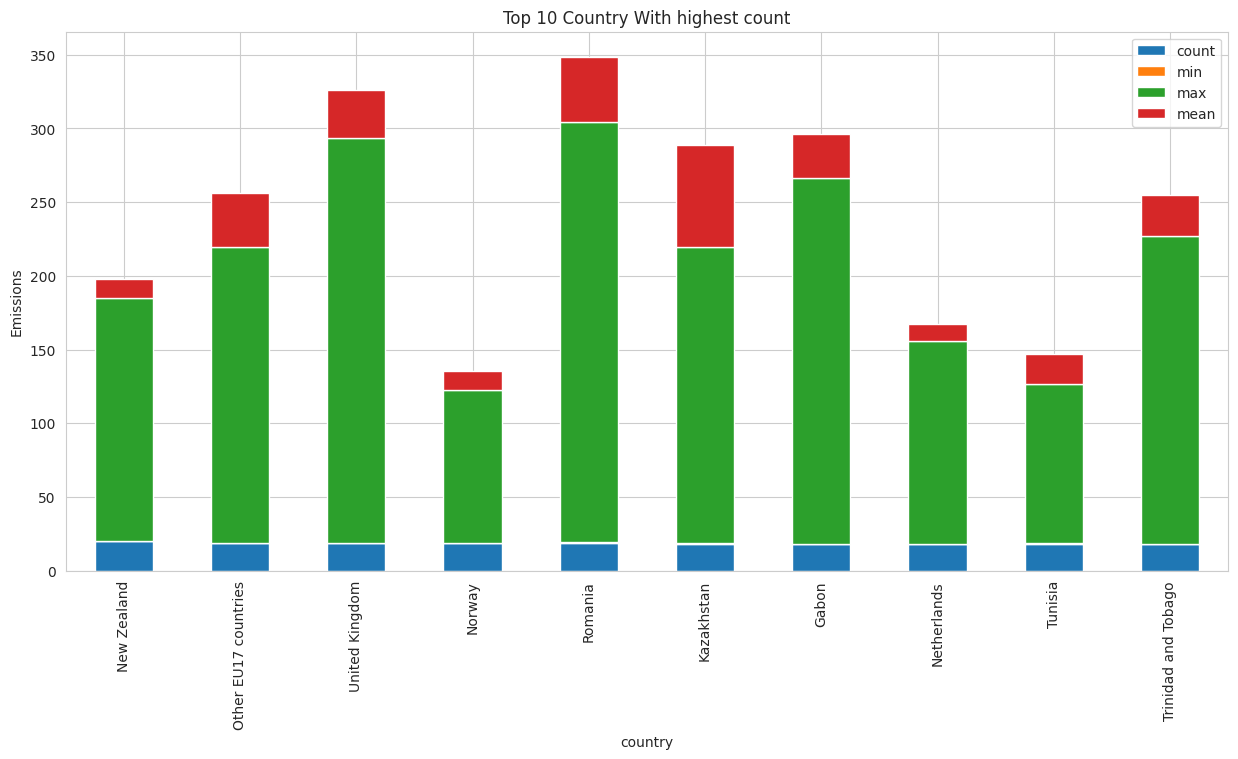

In [110]:
df.groupby('country')['emissions'].agg(['count', 'min', 'max','mean']).sort_values(by='count',ascending=False).head(10).plot(kind='bar', stacked=True,figsize=(15, 7))
plt.title('Top 10 Country With highest count')
plt.xlabel('country')
plt.ylabel('Emissions')
plt.xticks(rotation=90)
plt.show()

<Axes: xlabel='country'>

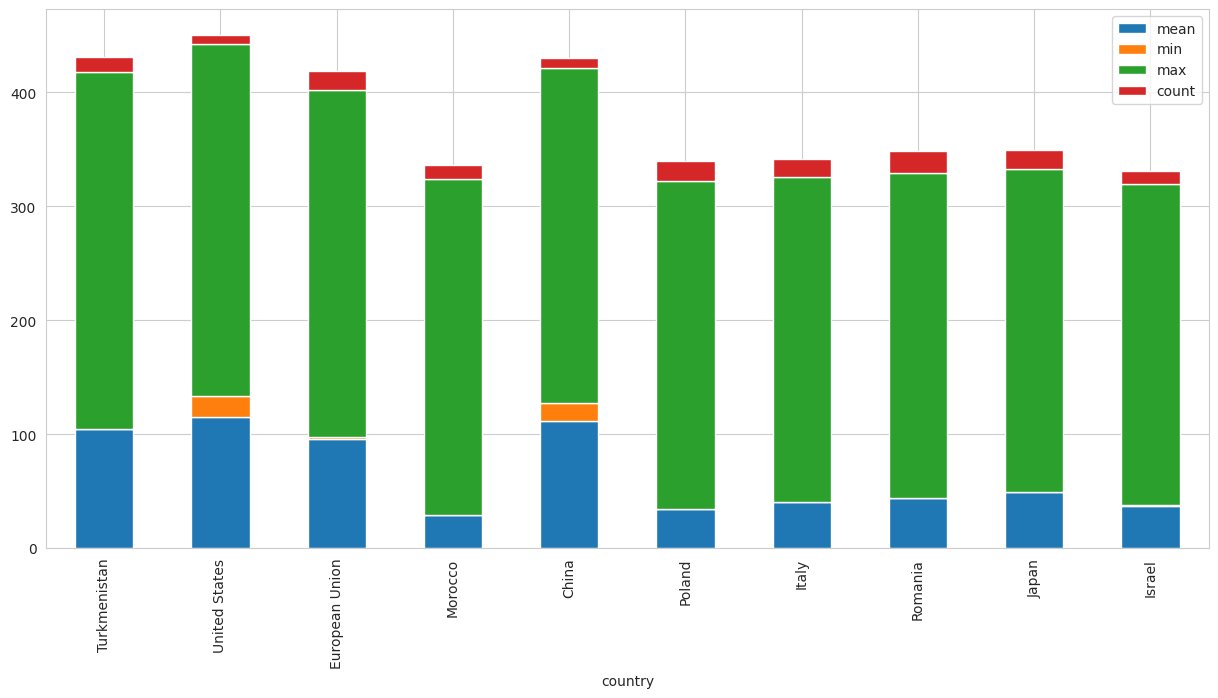

In [111]:
df.groupby('country')['emissions'].agg(['mean', 'min', 'max','count']).sort_values(by='max',ascending=False).head(10).plot(kind='bar', stacked=True,figsize=(15, 7))

### **Type**
- `Waste`:- Has the highest mean emissions `113.61`kt. count `61`
- `Energy`:- has the highest count with `1091` and has the mean emissions `35.56`

In [112]:
df.groupby('type')['emissions'].agg(['mean', 'min', 'max','count'])

,mean,min,max,count
type,,,,
Agriculture,111.080683,0.078721,304.871765,48
Energy,35.566903,0.000459,312.399994,1091
Other,35.993683,0.051872,290.898560,95
Waste,113.618787,2.491305,282.459564,61


<Figure size 1200x500 with 0 Axes>

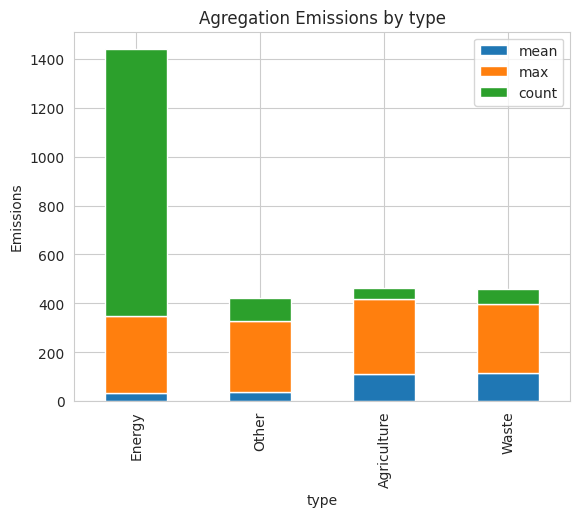

In [113]:
plt.figure(figsize=(12,5))
df.groupby('type')['emissions'].agg(['mean', 'max','count']).sort_values(by='mean').plot(kind='bar',stacked=True)
plt.title('Agregation Emissions by type')
plt.xlabel('type')
plt.ylabel('Emissions')
plt.xticks(rotation=90)
plt.show()

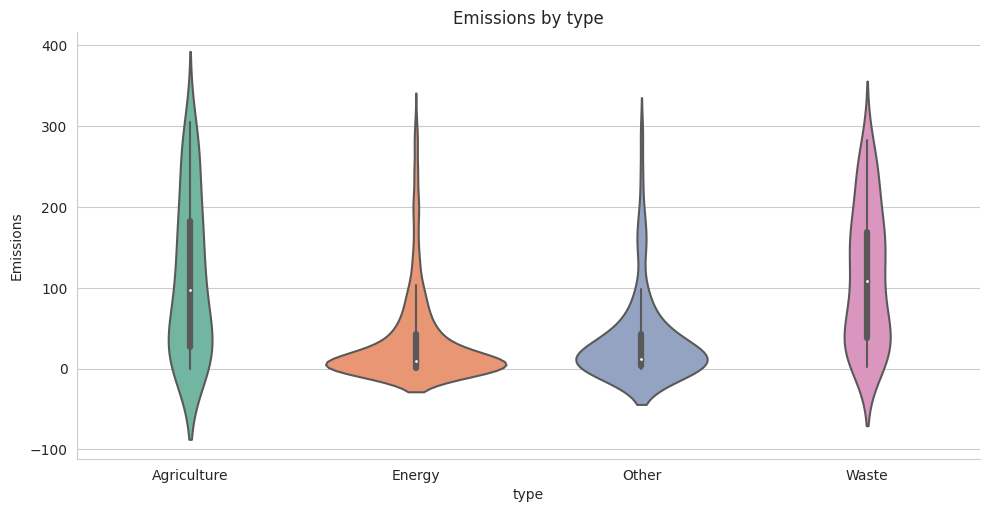

In [114]:
sns.set_style('whitegrid')
sns.catplot(x='type', y='emissions', data=df, kind='violin', aspect=2, palette='Set2')
plt.title('Emissions by type')
plt.xlabel('type')
plt.ylabel('Emissions')
plt.show()

### **Segment**
- `Total` has the highest mean emissions `84.11` and `260` count but has the also highest range:- `0.008-304.87`
- `Gas pipelines and LNG facilities` has the max value of `emissions` :- `312.39`



In [115]:
df.groupby('segment')['emissions'].agg(['mean', 'min', 'max','count']).sort_values(by='mean',ascending=False)

,mean,min,max,count
segment,,,,
Total,84.113577,0.008000,304.871765,260
Coking coal,71.915298,0.086830,304.996002,19
Gas pipelines and LNG facilities,42.274250,0.031971,312.399994,155
Bioenergy,40.586541,0.012000,244.179993,85
Onshore gas,34.849649,0.003344,281.032013,132
Onshore oil,31.649086,0.001081,309.158997,189
Offshore oil,30.436026,0.000459,294.007996,150
Offshore gas,25.671626,0.010770,198.300003,113
Steam coal,24.994196,0.078292,177.761002,16


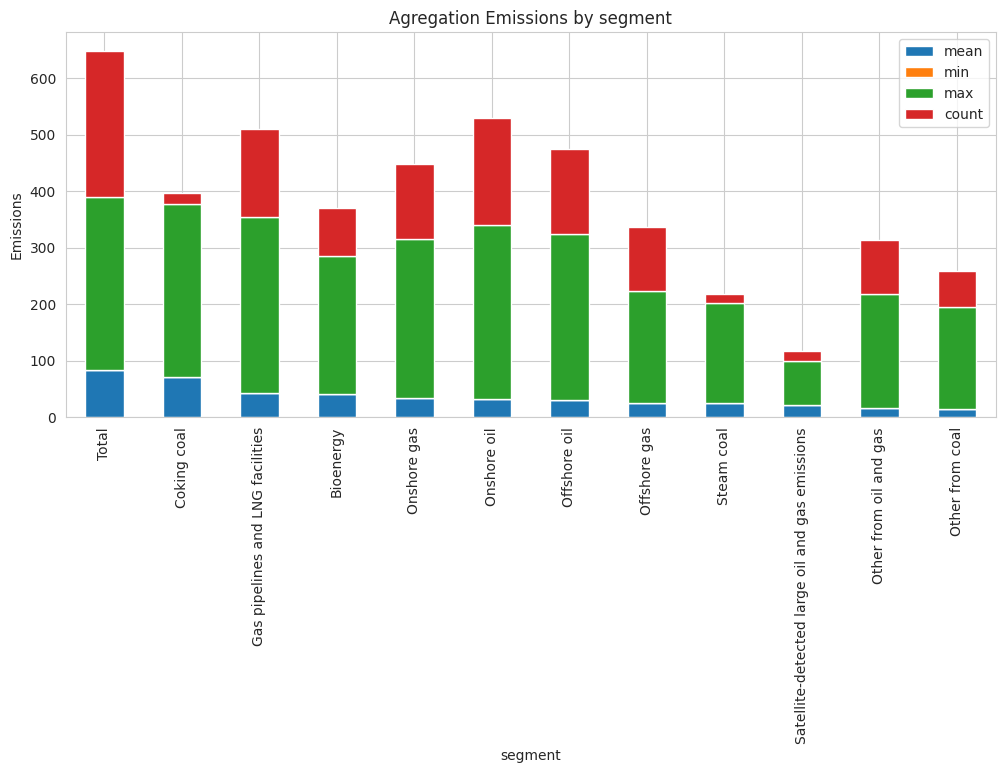

In [116]:
df.groupby('segment')['emissions'].agg(['mean', 'min', 'max','count']).sort_values(by='mean',ascending=False).plot(kind='bar',stacked=True,figsize=(12,5))
plt.title('Agregation Emissions by segment')
plt.xlabel('segment')
plt.ylabel('Emissions')
plt.xticks(rotation=90)
plt.show()

<Figure size 1700x800 with 0 Axes>

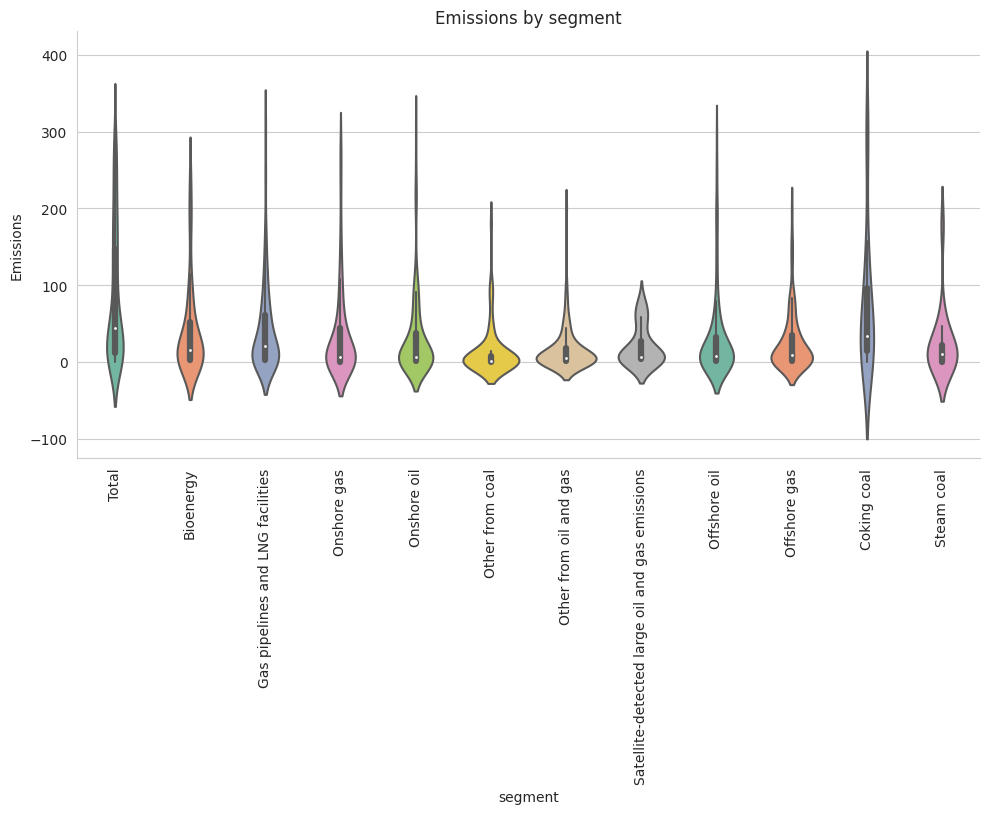

In [117]:
plt.figure(figsize=(17,8))
sns.set_style('whitegrid')
sns.catplot(x='segment', y='emissions', data=df, kind='violin', aspect=2, palette='Set2')
plt.title('Emissions by segment')
plt.xlabel('segment')
plt.xticks(rotation=90)
plt.ylabel('Emissions')
plt.show()

### **Reason**
- `All` Has the highest emissions mean `53.79`, Also has the highest count `556`
- `Vented` has the 2nd highest emissions mean `43.66`, Also has the highest count `304` 
- `Flared` has the lowest emissions mean `24.64` and lowest count `109` 
- `Fugitive` has the emissions mean `26.50` and has the count `326`
  - In this count is not that low but mean is low as per count.
  - because it has most of the emissions values spread between 0 to 25

In [118]:
df.groupby('reason')['emissions'].agg(['mean','min','max','count'])

,mean,min,max,count
reason,,,,
All,53.749770,0.004000,304.996002,556
Flared,24.645305,0.000459,203.024994,109
Fugitive,26.500905,0.001264,312.399994,326
Vented,43.667776,0.007256,294.390991,304


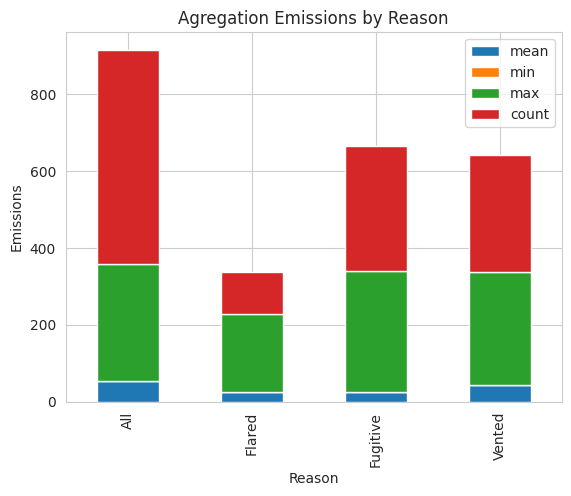

In [119]:
df.groupby('reason')['emissions'].agg(['mean','min','max','count']).plot(kind='bar',stacked=True)
plt.title('Agregation Emissions by Reason')
plt.xlabel('Reason')
plt.ylabel('Emissions')
plt.xticks(rotation=90)
plt.show()

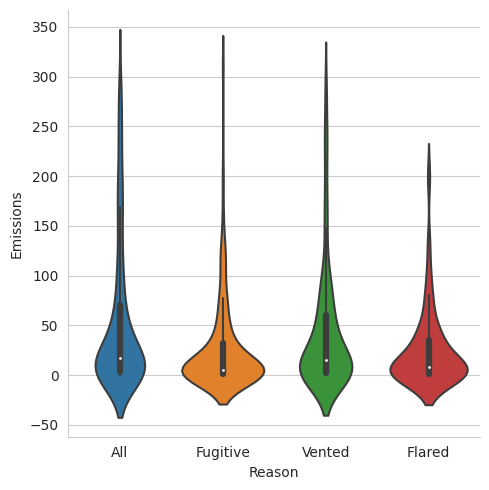

In [120]:
sns.catplot(data=df,x='reason',y='emissions',kind='violin')
plt.xlabel('Reason')
plt.ylabel('Emissions')
plt.show()

In [135]:
df.head()

,region,country,emissions,type,segment,reason,baseYear,notes
0,Africa,Algeria,257.611206,Agriculture,Total,All,2021,Average based on United Nations Framework Conv...
1,Africa,Algeria,0.052000,Energy,Bioenergy,All,2022,Estimates from end-uses are for 2020 or 2021 (...
2,Africa,Algeria,130.798996,Energy,Gas pipelines and LNG facilities,Fugitive,2022,Not available
3,Africa,Algeria,69.741898,Energy,Gas pipelines and LNG facilities,Vented,2022,Not available
4,Africa,Algeria,213.987000,Energy,Onshore gas,Fugitive,2022,Not available


### **Baseyear**
- `2021` has the highest mean emissions `76.87` and has the `204` count.
- `2022` has the mean emissions `35.56` and `1091` count.
  - 2022 has the highest count but mean is not that high because there is a high distribution in lower section.

In [136]:
df.groupby('baseYear')['emissions'].agg(['mean','min','max','count'])

,mean,min,max,count
baseYear,,,,
2021,76.872640,0.051872,304.871765,204
2022,35.566903,0.000459,312.399994,1091


<Axes: xlabel='baseYear'>

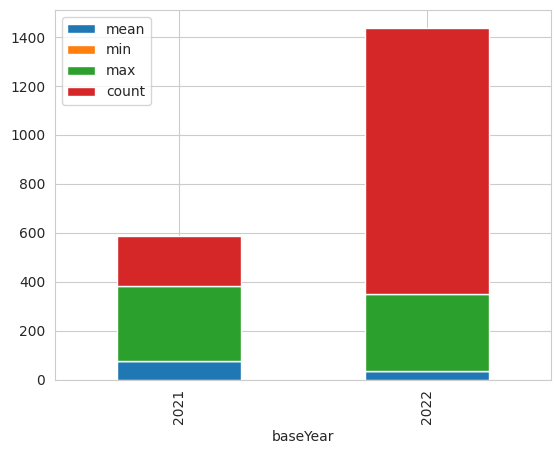

In [139]:
df.groupby('baseYear')['emissions'].agg(['mean','min','max','count']).plot(kind='bar',stacked=True)

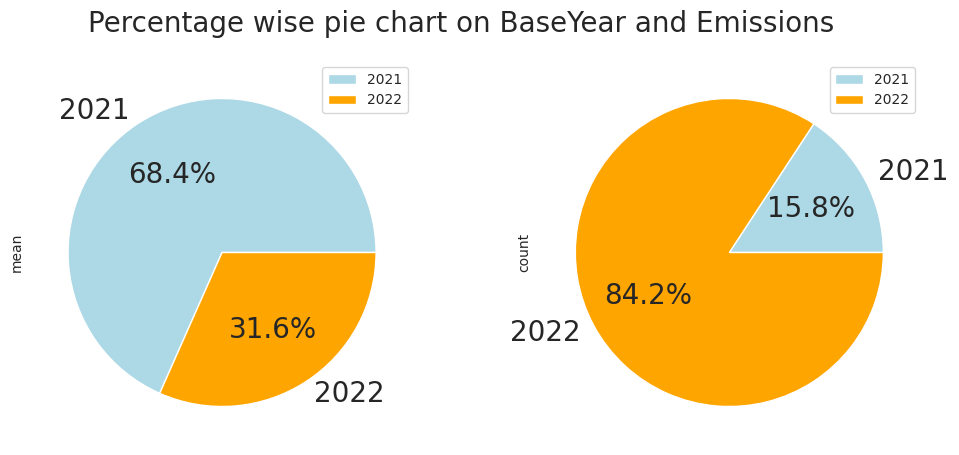

In [174]:
df.groupby('baseYear')['emissions'].agg(['mean','count']).plot(kind='pie', subplots=True, figsize=(12,5), autopct='%0.1f%%', colors=['lightblue', 'orange'], fontsize=20)
plt.suptitle('Percentage wise pie chart on BaseYear and Emissions', fontsize=20, ha='center')
plt.show()

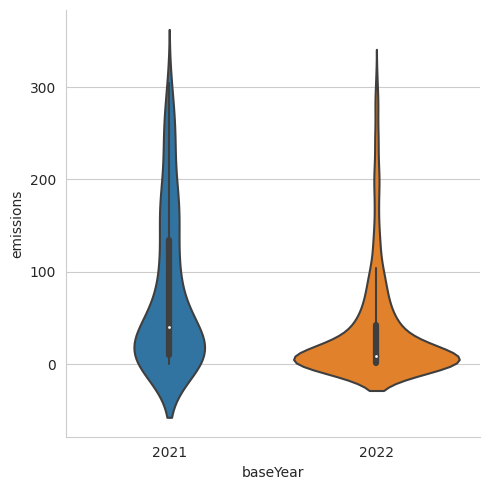

In [183]:
sns.catplot(data=df,x='baseYear',y='emissions',kind='violin')
plt.show()

# Write a summery of the Analysis in bullet points in this section **(Mandatory)**

### **Outliers Removal**
- The dataset initially had 1548 rows and 8 columns with outliers.
- The outliers were mainly in the region 'Other' and country 'World'.
- The outliers were removed before analysis, resulting in 1295 rows and 8 columns.
- The mean and median values of the emissions column decreased after the removal of outliers.
### **Univariate Analysis**
- `Region`: Africa had the highest count with 364 (28.1%).
- `Country`: New Zealand had the highest count with 20 and a mean value of 12.45.
- `Type`: Energy had the highest count with 84.2%, followed by Other with 7.3%, Waste with 4.7%, and Agriculture with 3.7%.
- `Segment`: Total had the highest count with 260 (20.01%), followed by Onshore Oil with 189 (14.6%).
- `Reason`: All had the highest count with 42.9%, followed by Fugitive with 25.2%.

**Numerical Column Univariate Analysis**

`Emissions`: The maximum emissions values were mostly between 0 to 25.
##**Bivariate Analysis**

- `Region`: North America had the highest mean emissions (70.84), followed by Russia & Caspian with the highest max value of emissions (312.39).
- `Country`: Central African Republic had the highest emissions mean (149.047), but only a count of 3. New Zealand had the highest count, but a low emissions mean of 12.39.
- `Type`: Waste had the highest mean emissions (113.61 kt) with a count of 61. Energy had the highest count with 1091 and a mean emissions value of 35.56 kt.
Segment: Total had the highest mean emissions (84.11), but also the highest range of emissions (0.008-304.87). Gas pipelines and LNG facilities had the highest emissions max value of 312.39 kt.
- `Reason`: All had the highest emissions mean (53.79) and count (556). Vented had the second-highest emissions mean (43.66) but the highest count (304). Fugitive had a lower mean value (26.50) but a higher count (326), while Flared had the lowest mean value (24.64) and lowest count (109).

- `BaseYear`:- 2021 had the highest average emissions value of 76.87 and a count of 204.
  - 2022 had a lower average emissions value of 35.56 but a much higher count of 1091, indicating a wider distribution of emissions values.
  - The wider distribution of emissions values in 2022 suggests a greater number of observations in the lower emissions range.